In [1]:
import tensorflow


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
import numpy as np

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
print('Target class ', y_train[43])

Target class  9


In [7]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
#Normalizing
#These MNIST images of 28×28 pixels are represented as an array of numbers whose values range from [0, 255] of type uint8.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255  # for normalizing the image to range from 0 to 1
X_test /= 255

X_train[41]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [9]:
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10) 
y_test = tensorflow.keras.utils.to_categorical(y_test,num_classes=10)

In [10]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 128)               4718720   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=100,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 78s 129ms/step - loss: 0.1262 - accuracy: 0.9618 - val_loss: 0.0543 - val_accuracy: 0.9825
Epoch 2/10
600/600 [==============================] - 81s 135ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0443 - val_accuracy: 0.9843
Epoch 3/10
600/600 [==============================] - 86s 143ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0417 - val_accuracy: 0.9884
Epoch 4/10
600/600 [==============================] - 87s 145ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0512 - val_accuracy: 0.9847
Epoch 5/10
600/600 [==============================] - 104s 173ms/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.0405 - val_accuracy: 0.9886
Epoch 6/10
600/600 [==============================] - 98s 163ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0473 - val_accuracy: 0.9870
Epoch 7/10
600/600 [==============================] - 88s 146ms/step - loss: 0.0066 - accuracy: 0.9976 - val_loss: 0.0520 - val_a

# model performance using CNN

In [12]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,y_test))

1875/1875 [==============================] - 32s 17ms/step - loss: 0.0016 - accuracy: 0.9995
[0.0016026892699301243, 0.9995499849319458]
313/313 [==============================] - 6s 18ms/step - loss: 0.0553 - accuracy: 0.9885
[0.055332355201244354, 0.9884999990463257]


# model performance using sequential

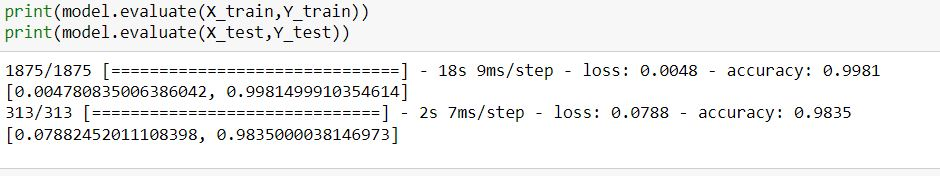